* STEP 1: 
Scrape data:
1. html pattern? scrape from a link
2. pdf
3. notepad

* STEP 2: (different function for french)
Clean data 
1. Lowercase each word
2. Replace contractions with their longer forms
3. Remove spaces
4. Remove special characters and unwanted words
5. with remove digits; keep digits

* STEP 3: (different function for french)
Preprocess data
1. count words/ lines.
2. part-of-speech
3. Tokenize each word by using nltk.WordPunctTokenizer() we will extract tokens from strings of words or sentences.
4. Sentence tokenizer
5. Lemmatize each word by using nltk.stem.WordNetLemmatizer() we will restore words to their dictionary forms so all words with similar meanings will be linked to one word.
6. Remove stopwords

* STEP 4: word cloud

* STEP 5: (different function for french)
Sentiment Analysis using different modules
1. Flair
2. NLTK


* pip install nltk
* pip install numpy
* pip install pandas
* pip install PyMuPDF # because this allow to remove header and footer
* pip install emoji
* pip install spacy
* pip install flair
* pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git #(for french)
* pip install wordcloud

In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

## Pipeline

In [4]:
#1
import re #module provides regular expression support
import os #it lets the user interact with the native OS Python is currently running on

#2
import pandas as pd #brings the pandas data analysis library into your current environment
from collections import Counter #a built-in Python module that implements specialized container datatypes
import fitz # a module to perform utility functions for the pdfs
import emoji #module that provides functions to deal with thes emojis 

#3
#nltk
import nltk  #a Python package that you can use for NLP.
from nltk.tokenize import sent_tokenize, word_tokenize #a Python module that you can use for word tokenize in nltk
from nltk.stem.wordnet import WordNetLemmatizer #a Python module that you can use for word lemmatise in nltk
from nltk.stem import PorterStemmer, SnowballStemmer # Python module that you can use for word stemming in nltk. Snowball is for french
from nltk.corpus import stopwords #a Python module that you can use for stopwords
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer # a Python package that you can use for word lemmatize in french
from nltk.sentiment.vader import SentimentIntensityAnalyzer# a Python module that you can use for sentiment analysis
from nltk import tag

#spacy
import spacy # Python package that you can use for NLP.
from wordcloud import WordCloud # Python package that you can use to convert to word to image.

#flair
import flair # simple natural language processing (NLP) library
from flair.nn import Classifier
from flair.data import Sentence

/home/infres/sshaurya/nlp_pipeline/venv_nlp_pipe/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### step 1: Scraping Data

STEP 1.1 - Collect Data from .txt files. Returns two lists - files and list_text

In [5]:
### from .txt
def get_text_files(base_html):
    '''
    extracts text from .txt files

    Parameters 
    ----------
    base_html: str
    base html is the path to the folder that contains all the txt files

    Returns 
    ----------
    list_files: list
    contains the list of file names

    list_text: list
    contains the list of extracted text from the files
    '''
    
    files = os.listdir(base_html)
    files.sort()
    list_text = []
    for i in range(0,len(files)):
        try:
            with open(f'{base_html}{files[i]}') as f:
                #print(f'{BASE_html}{files[i]}')
                lines = f.read()
                list_text.append(lines)
        except:
            list_text.append('NaN')
            #list_text.append('None')

    return files,list_text
# tuple or just list

In [6]:
base_html = '/home/infres/sshaurya/Aluna_pdf/html_letters/'
list_name,list_text = get_text_files(base_html)
len(list_name)

589

STEP 1.2 - Collect Data from pdf files. Returns two lists - files and list_text

In [7]:
### from pdf files
def get_pdf_files(base_pdf):
    #base_pdf = '/home/infres/sshaurya/Aluna_pdf/pdf_letters'
    '''
    extracts text from pdf files

    Parameters 
    ----------
    base_pdf: str
    base pdf is the path to the folder that contains all the pdf files

    Returns 
    ----------
    list_files: list
    contains the list of file names

    list_text: list
    contains the list of extracted text from the files
    '''
    
    files = os.listdir(base_pdf)
    files.sort()
    list_text = []
    for i in range(0,len(files)):
        whole_text = ''
        try:
            with fitz.open(f'{base_pdf}/{files[i]}') as pdf:
                for page in pdf:
                    text = page.get_text()
                    whole_text = " ".join([whole_text, text])
            list_text.append(whole_text)
        except:
            list_text.append('NaN')

    return files,list_text


In [8]:
### from pdf files
base_pdf = "/home/infres/sshaurya/Aluna_pdf/pdf_letters"
list_name,list_text = get_pdf_files(base_pdf)
len(list_name)

961

STEP 1.3 - Collect Data from md files. Returns two lists - files and list_text

In [9]:
### from md files
def get_md_files(base_md):
    #base_md="/home/infres/sshaurya/Policy/Sample OTA Data/123Greetings/Privacy Policy"
    '''
    extracts text from mark down files

    Parameters 
    ----------
    base_md: str
    base md is the path to the folder that contains all the md files

    Returns 
    ----------
    list_files: list
    contains the list of file names

    list_text: list
    contains the list of extracted text from the files
    '''
    
    files = os.listdir(base_md)
    files.sort()
    list_text = []
    for i in range(0,len(files)):
        try:
            with open(f'{base_md}/{files[i]}','r') as md:
                file_split = [line for line in md]
                file_split = " ".join(file_split)
            list_text.append(file_split)
        except:
            list_text.append('NaN')
    
    return files,list_text


In [10]:
base_md="/home/infres/sshaurya/Policy/Sample OTA Data/123Greetings/Privacy Policy"
list_name,list_text = get_md_files(base_md)
len(list_name)

8

### step 2: Clean Data

Inputs text string and returns clean text.
This function does following tasks:
* allows you to choose whether to replace html. By default it is False.
* allows you to choose whether to replace digital. By default it is False.
* allows you to choose whether to change emoji 2 words. By default it is False.

In [11]:
def clean_text(text, emoji2word = False, digits = False, html = False):
    '''
    cleans the text

    Parameters 
    ----------
    text: str
    contains uncleaned text that needs to be cleaned

    emoji2word: boolean
    if true, it lets you convert emojis into words by default it is False

    digits: boolean
    if true, lets you remove digits from the text by default it is False

    html: boolean
    if true, lets you remove html from the text by default it is True

    Returns 
    ----------
    text: str
    contains the cleaned text

    '''

    #Convert words to lower case
    text = text.lower()

    # converts emoji to words
    if emoji2word:
        emoji.demojize(text, delimiters=("", ""))

    if digits:
        #remove digits
        text = re.sub('[^A-Za-z\.\']+', ' ', text)
    else:
        # will just keep alphabets
        text = re.sub('[^A-Za-z0-9\.\']+', ' ', text)
    
    if html:
    # Remove hyperlinks and markup 
    # if data scraped from net 
    # remove unwanted characters
        text = re.sub('http://\S+|https://\S+|www.\S+', '', text)
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub("<[a][^>]*>(.+?)</[a]>", '', text)
        text = re.sub('<p>|</p>|<i>|</i>|<br />', ' ', text)
        text = re.sub('&gt;', " ", text)
        text = re.sub('&#x27;', " ", text)
        text = re.sub('&quot;', '', text)
        text = re.sub('&#x2F;', ' ', text)
        text = re.sub('&#62;', '', text)
        text = re.sub(r'&amp;', '', text)
    
    return text.strip() #text returned without extra spaces

#list(map(str.upper, list_text))
#list(map(lambda i:func(a, i), range(0, len(a))))


clean_list_text = list(map(clean_text, list_text))
df = pd.DataFrame({'Name': list_name, 'Text': list_text})
df['clean_list_text'] = df['Text'].apply(clean_text, html = False, digits = False)
c_list_text = list(df['clean_list_text'])


In [12]:
c_list_text

["home corporate info company profile careers investor relations media kit corporate info company profile careers investor relations media kit press room home corporate info company profile reasons and seasons content technology business model press room heart to heart faq media center copyright info copyright policy terms of use privacy policy contact us careers investor relations media kit hello world engagingly yours knock knock we're listening home company profile privacy policy privacy policy overview the use of the 123greetings website s and or 123greetings software and any 123greetings services and products collectively the website provided by 123greetings 123greetings are subject to the provisions of this privacy policy including any amendments or updates hereto. this privacy policy is incorporated into and is subject to the 123greetings terms of use. if you do not agree to this privacy policy please do not use the website. general 123greetings takes your privacy seriously. we 

### step 3: Prepocess Data

#### nltk preprocess

In [13]:
#STOPWORDS, TOKEN , TOP WORDS, POS, LEMMATIZATION, STEMMING

def preprocess_nltk(list_clean_text, mode): 
    '''
    takes list of string and mode and returns 5 elements named list_tokenize, list_pos, final_list_top_words, final_list_lemma, final_list_stem using the module nltk
    
    Parameters 
    ----------
    list_clean_text: list
    contains cleaned texts that will be tokenized, pos'ed and lemmatized. It will be used to get top 25 words

    mode: str
    choose whether to get elements in fr or en

    Returns 
    ----------
    list_tokenize: list
    contains list of tokens - tokenized through nltk

    list_pos: list
    contains list of pos - get pos through nltk

    final_list_top_words: list
    contains list of top words - get top 25 words through nltk

    final_list_lemma: list
    contains list of lemmatized words - lemmatised through nltk

    final_list_stem: list
    contains list of stemmed words - stemmed through nltk

    '''

    final_list_tokenize = []
    list_pos = []
    final_list_lemma = []
    final_list_stem = []
    final_list_top_words = []

    # mode to choose french or english stopwords
    if mode == 'fr':
        stops = set(stopwords.words('french'))
        lemma_function = FrenchLefffLemmatizer()
        fr = SnowballStemmer('french')
        for i in range(0,len(list_clean_text)):
            words = word_tokenize(list_clean_text[i], language='french')
            list_tokenize = []
            list_lemma = []
            list_stem = []
            list_text = []
            for word in words:
                if word not in stops and word.isalpha():
                    list_tokenize.append(word)
                    lemma = lemma_function.lemmatize(word)
                    list_lemma.append(lemma)
                    list_stem.append(fr.stem(word))
                    list_text.append(word)
            word_freq = Counter(list_text)
            pos = nltk.pos_tag(list_text)
            list_pos.append(pos)
            common_words = word_freq.most_common(25)
            final_list_tokenize.append(list_tokenize)
            final_list_top_words.append(common_words)    
            final_list_lemma.append(list_lemma)
            final_list_stem.append(list_stem)

    elif mode == 'en':
        stops = set(stopwords.words('english'))
        lemma_function = WordNetLemmatizer()
        ps = PorterStemmer()
        for i in range(0,len(list_clean_text)):
            words = word_tokenize(list_clean_text[i])
            list_lemma = []
            list_tokenize = []
            list_stem = []
            list_text = []
            for word in words:
                if word not in stops and word.isalpha():
                    list_tokenize.append(word)
                    lemma = lemma_function.lemmatize(word)
                    list_lemma.append(lemma)
                    list_stem.append(ps.stem(word))
                    list_text.append(word)
            word_freq = Counter(list_text)
            pos = nltk.pos_tag(list_text)
            list_pos.append(pos)
            common_words = word_freq.most_common(25)
            final_list_tokenize.append(list_tokenize)
            final_list_top_words.append(common_words)    
            final_list_lemma.append(list_lemma)
            final_list_stem.append(list_stem)
    else:
        raise ValueError("Invalid mode specified. Choose 'fr' or 'en'")

    return final_list_tokenize, list_pos, final_list_top_words,final_list_lemma,final_list_stem
# lemma after stopwords

In [14]:
mode='en'
list_tokenize_nl, list_pos_nl, final_list_top_words_nl,final_list_lemma_nl,final_list_stem_nl = preprocess_nltk(c_list_text, mode)
#10 for top 25 words will give differentt 

In [15]:
list_pos_nl[3]

[('home', 'NN'),
 ('ecards', 'NNS'),
 ('photocards', 'NNS'),
 ('connect', 'VBP'),
 ('studio', 'NN'),
 ('mobile', 'NN'),
 ('app', 'NN'),
 ('birthday', 'NN'),
 ('thank', 'VBD'),
 ('anniversary', 'JJ'),
 ('everyday', 'JJ'),
 ('love', 'IN'),
 ('inspirational', 'JJ'),
 ('congrats', 'NNS'),
 ('friendship', 'VBP'),
 ('family', 'NN'),
 ('cute', 'NN'),
 ('events', 'NNS'),
 ('holidays', 'VBZ'),
 ('morepetsworld', 'NN'),
 ('languagesflowersat', 'JJ'),
 ('workweddingkeep', 'NN'),
 ('touchinvitations', 'NNS'),
 ('share', 'NN'),
 ('smile', 'JJ'),
 ('day', 'NN'),
 ('want', 'VBP'),
 ('happy', 'JJ'),
 ('day', 'NN'),
 ('chocolate', 'VB'),
 ('cheesecake', 'NN'),
 ('day', 'NN'),
 ('daylight', 'VBD'),
 ('saving', 'VBG'),
 ('time', 'NN'),
 ('begins', 'VBZ'),
 ('mar', 'JJ'),
 ('international', 'JJ'),
 ('women', 'NNS'),
 ('day', 'NN'),
 ('mar', 'VBZ'),
 ('david', 'JJ'),
 ('day', 'NN'),
 ('mar', 'VBD'),
 ('pig', 'JJ'),
 ('day', 'NN'),
 ('mar', 'VBD'),
 ('optimism', 'NN'),
 ('month', 'NN'),
 ('march', 'VBD'),
 

#### spacy preprocess

In [16]:
nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('fr_core_news_sm')

In [17]:
def preprocess_spacy(list_clean_text, mode):
    '''
    takes list of string and mode and returns 5 elements named list_tokenize, list_pos, final_list_top_words, final_list_lemma, final_list_stem using the module spacy
    
    Parameters 
    ----------
    list_clean_text: list
    contains cleaned texts that will be tokenized, pos'ed and lemmatized. It will be used to get top 25 words

    mode: str
    choose whether to get elements in fr or en

    Returns 
    ----------
    list_tokenize: list
    contains list of tokens - tokenized through spacy

    list_pos: list
    contains list of pos - get pos through spacy

    final_list_top_words: list
    contains list of top words - get top words through spacy

    final_list_lemma: list
    contains list of lemmatized words - lemmatised through spacy

    '''

    final_list_tokenize = []
    final_list_pos = []
    final_list_lemma = []
    final_list_top_words = []
    # mode to choose french or english stopwords
    if mode == 'fr':
        for i in range(0,len(list_clean_text)):
            doc = nlp(list_clean_text[i])
            list_tokenize = []
            list_pos = []
            list_lemma = []
            word = []
            for token in doc:
                if not token.is_stop and token.is_alpha: # and not token.is_punct
                    list_tokenize.append(token.text)
                    list_pos.append(token.pos_)
                    list_lemma.append(token.lemma_)
                # top 25 most common tokens
                if not token.is_stop and not token.is_punct and token.is_alpha:
                    word.append(token.text)
            word_freq = Counter(word)
            common_words = word_freq.most_common(25)
            #comment_words += " ".join(tokens)+" "
            final_list_top_words.append(common_words)
            final_list_tokenize.append(list_tokenize)
            final_list_pos.append(list_pos)
            final_list_lemma.append(list_lemma)
            
    elif mode == 'en':

        for i in range(0,len(list_clean_text)):
            doc = nlp(list_clean_text[i])
            list_tokenize = []
            list_pos = []
            list_lemma = []
            word = []
            for token in doc:
                if not token.is_stop and token.is_alpha: # and not token.is_punct
                    list_tokenize.append(token.text)
                    list_pos.append(token.pos_)
                    list_lemma.append(token.lemma_)
                # top 25 most common tokens
                if not token.is_stop and not token.is_punct and token.is_alpha:
                    word.append(token.text)
            word_freq = Counter(word)
            common_words = word_freq.most_common(25)
            #comment_words += " ".join(tokens)+" "
            final_list_top_words.append(common_words)
            final_list_tokenize.append(list_tokenize)
            final_list_pos.append(list_pos)
            final_list_lemma.append(list_lemma)

    return final_list_tokenize, final_list_pos, final_list_top_words,final_list_lemma

In [18]:
list_tokenize, final_list_pos, final_list_top_words,final_list_lemma = preprocess_spacy(c_list_text, mode='en')

In [19]:
final_list_top_words[3]

[('information', 113),
 ('website', 57),
 ('use', 40),
 ('privacy', 32),
 ('personal', 28),
 ('policy', 23),
 ('party', 23),
 ('personally', 19),
 ('provide', 19),
 ('identifiable', 18),
 ('content', 17),
 ('data', 17),
 ('parties', 17),
 ('collect', 16),
 ('services', 15),
 ('including', 15),
 ('service', 15),
 ('contact', 14),
 ('day', 12),
 ('ip', 12),
 ('ecard', 12),
 ('mar', 11),
 ('help', 11),
 ('address', 11),
 ('features', 10)]

### step 4: Word Cloud

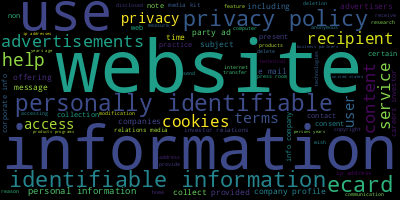

In [20]:
def word_cloud(text):
    '''
    Parameters 
    ----------
    takes text and converts them into image format. Shows top common words in the image easy to comprehend.

    '''
    # if style == 'list':
    #     text.split(',')
    if type(text) == list:
        text = ' '.join(text)
    wordcloud = WordCloud().generate(text)
    # Generate the word cloud
    # wordcloud = WordCloud(background_color="white",
    #                     max_words= 200,
    #                     contour_width = 8,
    #                     contour_color = "steelblue",
    #                     collocations=False).generate(text)
    image = wordcloud.to_image()
    image.show()
word_cloud(list_tokenize[0])
#https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414

### step 5: Sentiment Analysis

#### 5.1 nltk sentiment analysis

In [21]:
def sa_nltk(input_clean_text):
    '''
    takes list of string and style and returns 4 elements named neg, neu, pos, compound or list_neg,list_neu,list_pos,list_compound depending on the type of style the user has put.
    
    Parameters 
    ----------
    input_clean_text: list
    contains cleaned text that will be used for sentiment analysis using nltk vader 

    Returns 
    ----------
    list_neg: list
    contains list of negative score

    list_neu: list
    contains list of neutral score

    list_pos: list
    contains list of postive score

    list_compound: list
    contains list of compound score

    neg: int
    contains negative score

    neu: int
    contains neutral score

    pos: int
    contains postive score

    compound: int
    contains compound score
    '''

    sent = SentimentIntensityAnalyzer()
    
    if type(input_clean_text) == list:
        list_neg = []
        list_neu = []
        list_pos = []
        list_compound = []
        for i in range(0,len(input_clean_text)):
            score = sent.polarity_scores(input_clean_text[i])
            list_neg.append(score['neg'])
            list_neu.append(score['neu'])
            list_pos.append(score['pos'])
            list_compound.append(score['compound'])
        return list_neg,list_neu,list_pos,list_compound

    else:
        score=sent.polarity_scores(input_clean_text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        compound = score['compound']
        return neg, neu, pos, compound
        


In [22]:
list_neg,list_neu,list_pos,list_compound = sa_nltk(c_list_text)

#### 5.2 Flair Sentiment Analysis

In [23]:
def sa_flair(input_clean_text):
    '''
    takes list of string and style and returns 3 elements named label, score or list_label, list_score, list_label_all depending on the type of style the user has put.
    
    Parameters 
    ----------
    input_clean_text: list
    contains cleaned text that will be used for sentiment analysis using flair

    Returns 
    ----------
    list_label: list
    contains list of labels that shows the type of emotions

    list_score: list
    contains list of scores about how confident it is regarding the label

    '''

    #tagger = Classifier.load('sentiment')
    classifier = Classifier.load('en-sentiment')
    if type(input_clean_text) == list:
        list_label = []
        list_score = []
        list_label_all = []
        for i in range(0,len(input_clean_text)):
            sentence = Sentence(input_clean_text[i])
            classifier.predict(sentence)
            metrics = sentence.labels
            list_label_all.append(metrics)
            str_label = str(sentence.labels[0])
            str_label_sent = str_label.split('→ ')[1].split(" ")
            list_label.append(str_label_sent[0])
            list_score.append(str_label_sent[1])
        
        return list_label, list_score, list_label_all
    else:
        sentence = Sentence(input_clean_text)
        classifier.predict(sentence)
        str_label = str(sentence.labels[0])
        str_label_sent = str_label.split('→ ')[1].split(" ")
        label = str_label_sent[0]
        score = str_label_sent[1]
        return label, score

In [24]:
list_label, list_score, list_label_all = sa_flair(c_list_text)

In [25]:
list_label

['NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE']